# An Introduction to Psychology Today Therapist Data

In this inagural blog post, I want to introduce the motivation and data for a data science project I've been working on.

For the last 6 years, I have been working on a PhD in Harvard's [Clinical Science](https://psychology.fas.harvard.edu/clinical-psychology) program (part of the Psychology department). As part of my training, I have become familiar with the research base (or lack thereof) for various psychological therapies, as well as with the more general nuances and particulars in the field of mental health treatment.

Trying to put my expertise to good use, I have often provided guidance to friends and relatives seeking qualified therapists. And on many occasions I have done the leg work of searching for and evaluating potentional therapists.

Much of this time is spent on Psychology Today's (PT) [Find a Therapist](https://therapists.psychologytoday.com/rms/?tr=Hdr_SubBrand) directory, the most extensive online public directory of mental-healthcare providers in the United States. If you were to search Google for a [therapist in your city](http://google.com/search?q=Boston+Ma+therapists), PT's therapist directory would most likely be the first (non-Ad) search result. Unless you live in an very rural area, there are likely to be 100s of therapists within 20 miles of you that have a profile on PT. As such, it is probably the most widely used method of locating potential therapists ([aside from asking friends and family](https://www.psychologytoday.com/blog/freudian-sip/201102/how-find-the-best-therapist-you)).

For a relatively small monthly fee, mental health providers (typically in private practice) can take advantage of PT's online visibility and reach by creating a profile in their directory. Profiles are highly structured. Providers can include their title (e.g., psychologist, counselor), degree(s), years of experience, fee, issues treated, treatment orientations/modalities, and brief open-ended description of their approach, goals, and experience. When searching for a therapist, potential consumers (or 'patients', but I'll stick with 'consumers' because much of the therapist-finding process is conducted in the mindset of a consumer) can use search filters to display only those profiles that meet certain criteria.

In using PT's directory, a number of things hit me:
1. Finding a therapist is HARD. Possibly for some of the following reasons.
2. Within a particular category (e.g., providers who treat relationship difficulties), lots of providers sound the same. Just for kicks, here are a few quotes from different therapists on a single search results page:
  - I provide a safe, compassionate environment that is supportive and free from judgment.
  - I provide a safe, non-judgmental environment to help you gain a deeper understanding of yourself and your life experiences.
  - I provide a supportive, safe, nonjudgmental space to share your feelings and address aspects of yourself and your life that you'd like to change or enhance.
  - I believe that most of us can greatly benefit from a safe, trusting and collaborative therapeutic relationship.
3. There are a lot of providers peddling pseudo-scientific, or downright non-scientific, treatments. (Snarky aside: 'Eclectic therapy' is just another way of saying 'I do whatever I want. I may or may not follow established research or best practices'). Can you imagine a physician saying this and getting away with it?
4. The mental health field is highly unregulated. As long as you don't use one of a few protected titles (e.g., psychologist, licensed [anything], psychiatrist), you can call yourself pretty much anything else, and can provide almost any psycho-social service/treatment you want. And those consumers who are not trained in the mental health field are none the wiser.

On the heels of these insights, I thought that a more thorough investigation of PT profiles would be a fascinating way to answer a variety of questions about mental health treatment providers and the field more generally. Because it is a national database, PT profiles can also be compared across regions.

For the remainder of this post, I will describe my data collection process and present some general descriptive information about the profiles, along with some commentary/analysis. In future posts I will use the data to address more pointed questions.

-----------


## Data collection methods

All the code for data scraping and cleaning can be found in my [github repository](https://github.com/stevenfelix/PsychologyToday). All code is written in Python 2.7.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import json

data = pd.read_csv('../data/therapist_profiles.csv', index_col='id_num')

with open("../data/profiledict.json", "r") as fd:
    profile_dict = json.load(fd)

with open("../data/profilefeaturesdict_bool_dict.json", "r") as fd:
    features_dict = json.load(fd)

### Sampling

From each of the 50 US states, 200 profiles were semi-randomly selected. To do this, the following process was followed for each provider: First, a random zip code was selected from a specific state (e.g., Kansas). PT was then queried using this zip code. Because PT appears to randomly shuffle its search results across identical queries (i.e., if you search 02139 twice, the order of therapists will be different), the first profile in the results was selected. This process was repeated >=200 times for each state (enough times that 200 different profiles were selected).

### Profile scraping

From each selected profile, I scraped the following information (if provided):
 - provider name
 - title (e.g., Licensed Clinical Social Worker)
 - degree(s)
 - years of experience (if a range provided, I rounded down)
 - school
 - year graduated
 - licence (# and issuing state)
 - fee (if range provided, average taken)
 - accepts insurance (yes/no only)
 - city, state, zip
 - list of specialities
 - list of issues treated
 - list of "mental health" problems treated (this turns out to be useless)
 - treatment orientation
 - treatment modality

In [20]:
data.head()

,name,title,degrees,city,state,ZIP,profile,years,school,statelicense,...,issuesnum,mentalhealth,mentalhealthnum,sexuality,treatmentapproach,treatmentapproachnum,treatmentorientation,treatmentorientationnum,url,region
id_num,,,,,,,,,,,,,,,,,,,,,
108128,David Joseph Alpert,counselor,"lmhc, ladc, cadc, ncc, pgs",West Newton,Massachusetts,02465,My ideal client values authenticity. By authen...,20.0,Rhode Island College,896 Massachusetts,...,43.0,"Dissociative Disorders, Impulse Control Disord...",5.0,"Bisexual, Gay, Lesbian",NaN,0.0,"Art Therapy, Attachment-based, Client-Centered...",25.0,https://therapists.psychologytoday.com/rms/pro...,northeast
273873,Tim Turco,psychologist,phd,Columbus,Georgia,31901,A struggling marriage is not failed marriage. ...,NaN,NaN,PSY002346 Georgia,...,NaN,NaN,NaN,NaN,NaN,0.0,Family / Marital,1.0,https://therapists.psychologytoday.com/rms/pro...,south
262595,Tanya DiGiovanni-Goldbach,licensed professional counselor,"ma, lpc",Atlanta,Georgia,30309,If you are reading this profile you are taking...,NaN,NaN,LPC005739 Georgia,...,5.0,NaN,NaN,"Bisexual, Gay, Lesbian",NaN,0.0,Client focused,1.0,https://therapists.psychologytoday.com/rms/pro...,south
245763,Kristen Stitt,marriage & family therapist,lmft,Hutchinson,Kansas,67501,I am a Licensed Marriage and Family Therapist ...,2.0,Friends University,2628 Kansas,...,23.0,"Dissociative Disorders, Impulse Control Disord...",3.0,NaN,NaN,0.0,"Attachment-based, Cognitive Behavioral (CBT), ...",11.0,https://therapists.psychologytoday.com/rms/pro...,midwest
328035,Angela Konitzer,licensed professional counselor,"ma, lpc",New London,Wisconsin,54961,Angie is a Licensed Professional counselor and...,6.0,NaN,5137,...,22.0,NaN,NaN,NaN,NaN,0.0,"Attachment-based, Christian Counseling, Cognit...",12.0,https://therapists.psychologytoday.com/rms/pro...,midwest


-----------

## What are the most common provider specialties, treatment orientations, and issues? Does it vary by region?



-----------------

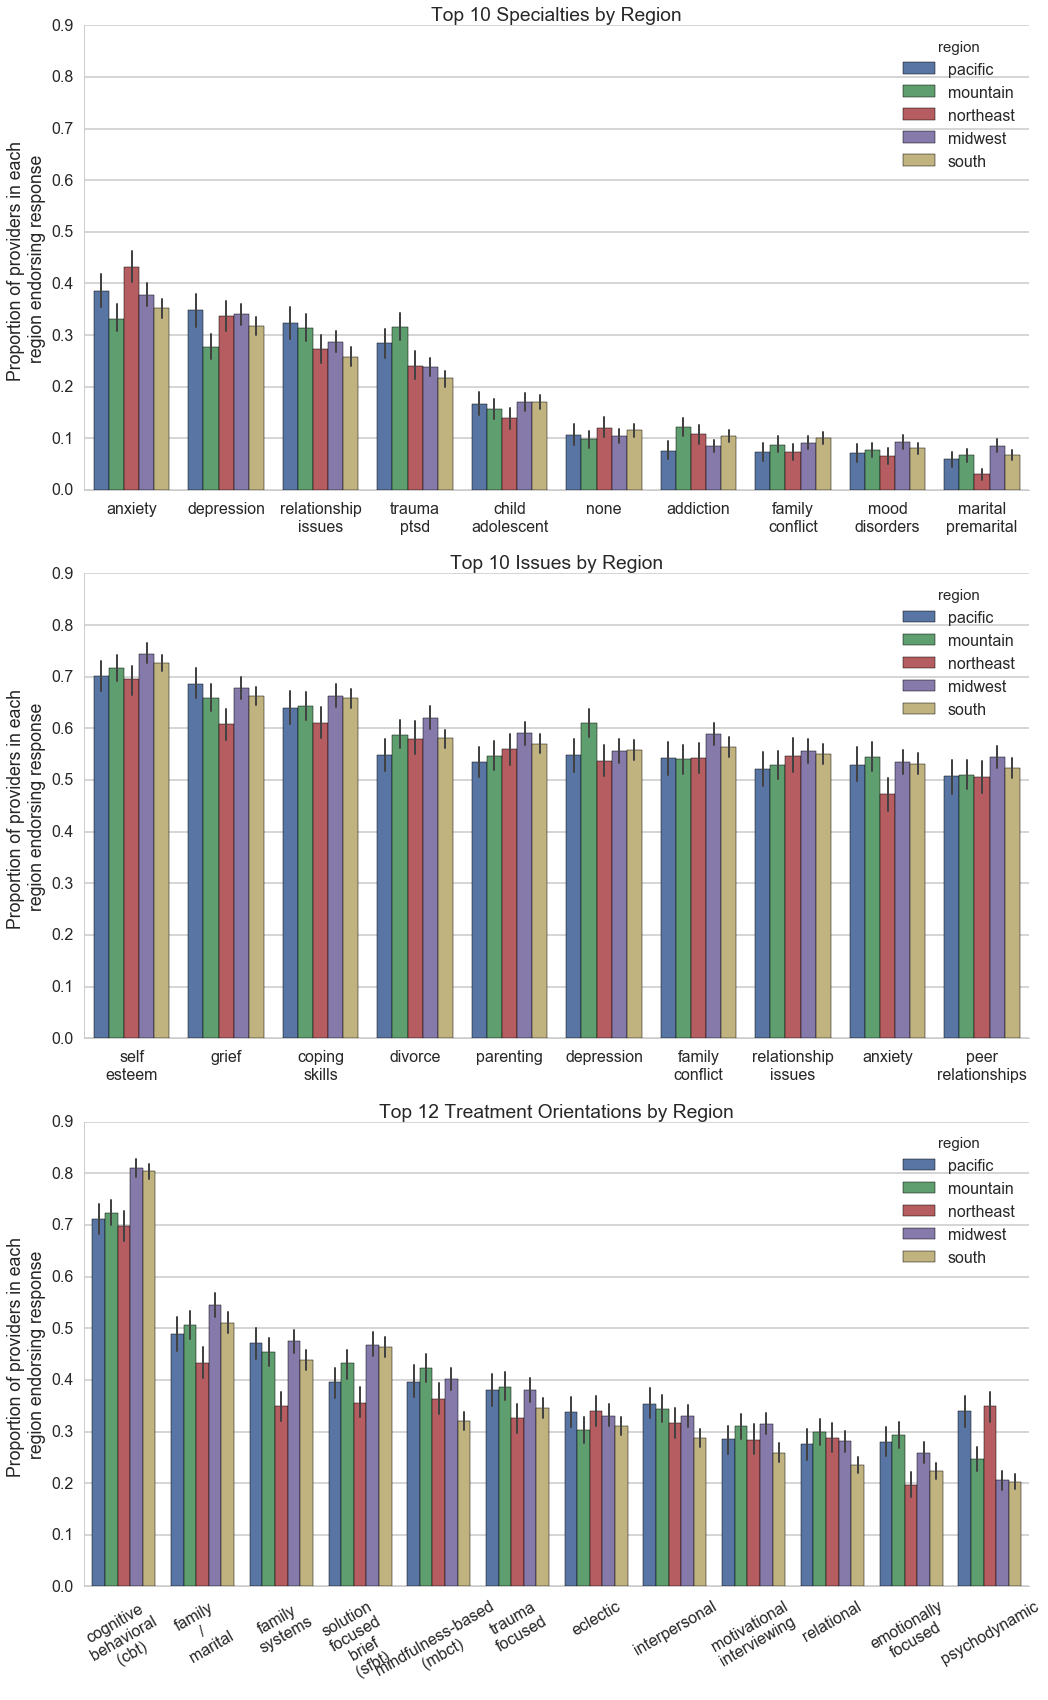

In [31]:
# Function to process and plot data for each relevant variable
def region_plots(variable,topnum,prettytitle,ax):
    df = pd.DataFrame(features_dict[variable])
    df.index = df.index.astype(int)
    #if u'' in df.columns:
    #    df = df.drop(u'',axis=1)
    top10 = df.sum().sort_values(ascending=False)[:topnum].index
    df_top10 = df[top10]
    df_top10 = df_top10.join(data.region)
    dflong = pd.melt(frame=df_top10, id_vars='region', value_vars=top10)
    #sns.factorplot(x ='region', y='value', col = 'variable', col_wrap=2, data = sp_long, kind = 'bar')
    sns.barplot(x ='variable', y='value', orient = 'v',hue = 'region', data = dflong, errwidth = 2, ax = ax);
    sns.despine();
    title = "Top {} {} by Region".format(topnum,prettytitle)
    ax.set_title(title);
    ax.set_xlabel('')
    labels = ['\n'.join(i.replace('and ','').replace('or ','').split()) for i in top10]
    if variable == 'treatmentorientation': ax.set_xticklabels(labels,rotation=30)
    else: ax.set_xticklabels(labels)
    ax.set_ylabel('Proportion of providers in each \nregion endorsing response');

# Loop through 3 variables
fig,axs = plt.subplots(3,1,figsize = (15,24), sharey=True)
regionplots = [('specialties',10, "Specialties", axs[0]),
                ('issues',10, "Issues", axs[1]),
                ('treatmentorientation',12, "Treatment Orientations", axs[2])]
for variable, topnum, title, ax in regionplots:
    region_plots(variable,topnum,title,ax)
fig.tight_layout();

### What are the most common degrees held?

###

labels = ["{0} - {1}".format(i, i + 9) for i in [0,10,20]]
labels.append('30+')
data['years_ord'] = pd.cut(data.years, [0,10,20,30,100], right=False, labels=labels)
#counts = data.groupby('years_ord').size()

--------------------
### Limitations of these data

- Bias: Because this is an opt-in, for-fee service, there is certainly a selection bias in any sample of profiles taken from PT. Profiles are typically created by providers who have a private practice. This means that providers who work out of hospitals or other large treatment centers/organization (e.g., the VA, Kaiser, community clinics) are less likely to have a PT profile. It is also likely that these providers may have a different set of characteristics than those in private practice (perhaps shorter average duration of treatment, more likely to take insurance, more likely to have certain types of degrees and training, more likely to treat more severe forms of psychopathology). As such, PT profile data cannot be used to understand the overall mental health field in the US. It is best thought of as an overview of the private-practice field (and even this is a bit biased, since there are certain clusters of private-practictioners who are less likely to have a PT profile).
